# Adult

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features
col_names = X.columns
X = X.values
y = adult.data.targets
y = y.map(lambda x: {'<=50K.':'<=50K', '>50K.':'>50K'}.get(x, x)).map(lambda x: {'<=50K':0, '>50K':1}[x])['income'].values

In [10]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [3]:
import numpy as np

np.save(f'adult', {'X':X, 'y':y, 'col_names':col_names, 'cat_ids':[1, 3, 5, 6, 7, 8, 9, 13]})

In [22]:
loaded = np.load('/home/redgreen/ssl/metric/adult.npy', allow_pickle=True).item()

pd.DataFrame(loaded['X'], columns=loaded['col_names']).iloc[:, [1, 3, 5, 6, 7, 8, 9, 13]].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder

temp = pd.DataFrame(loaded['X'], columns=loaded['col_names'])[['workclass', 'occupation', 'native-country']]
le_temp = temp.copy().fillna(0)
for i in range(3):
    le = LabelEncoder()
    le_temp.iloc[:, i] = le.fit_transform(temp.iloc[:, i])

In [77]:
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url_data_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

features = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
label = "income"
columns = features + [label]
df_train = pd.read_csv(url_data, names=columns)
df_test = pd.read_csv(url_data_test, names=columns)

In [84]:
df_train.shape[0] + df_test.dropna().shape[0]

48842

In [87]:
df_train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# credit card

In [11]:
import numpy as np
import pandas as pd
credit = pd.read_csv('/home/redgreen/ssl/metric/default of credit card clients.csv', 
                     skiprows=1).iloc[:, 1:]


X = credit.iloc[:, :-1]
col_names = X.columns
y = credit.iloc[:, -1]
cat_cols = [1, 2, 3]
num_cols = [0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
np.save(f'credit', {'X':X.values, 'y':y.values, 'col_names':col_names, 
                    'cat_ids':[1, 2, 3]})

In [15]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

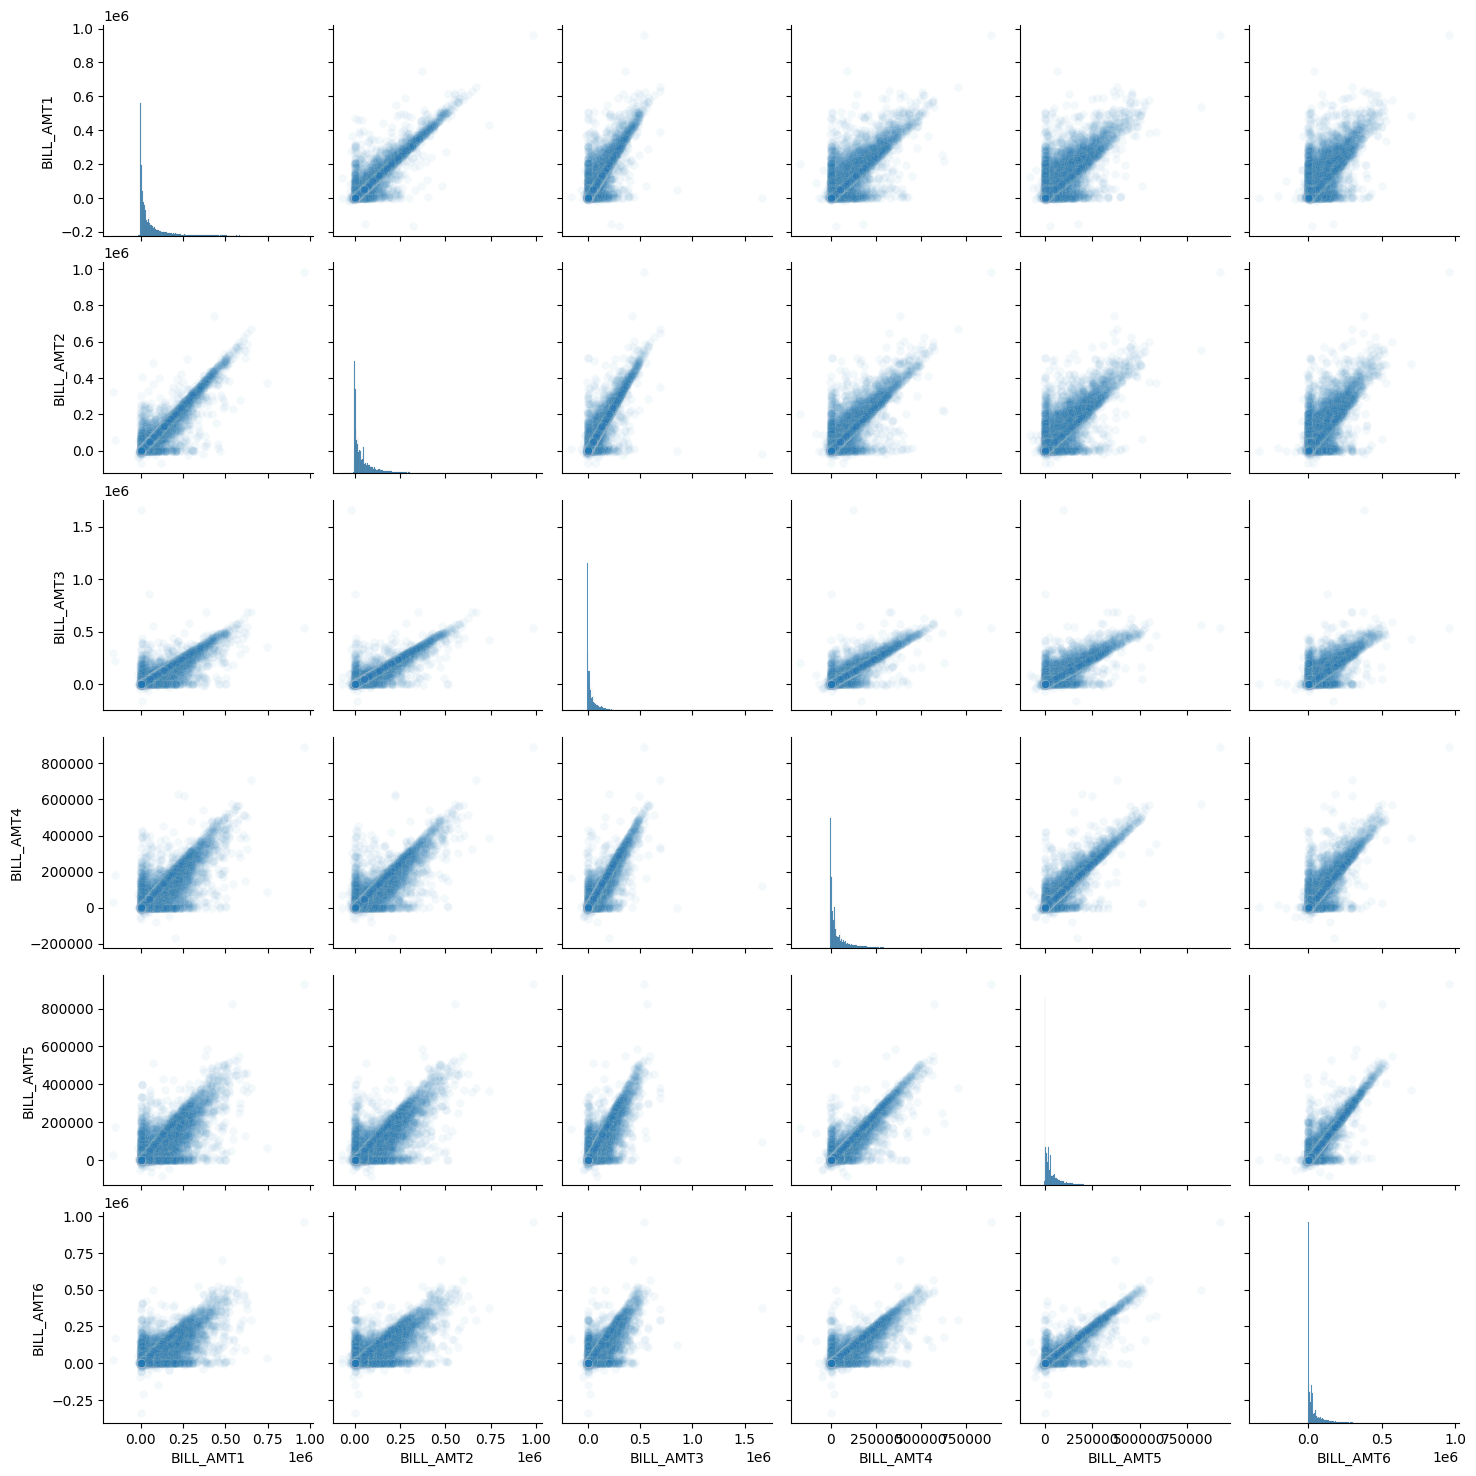

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns', 30)
# plt.scatter(credit['BILL_AMT3'],credit['BILL_AMT1'])
sns.pairplot(credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], plot_kws={'alpha': 0.05})
plt.show()


# Other

In [105]:
import pandas as pd
noised = np.load('/home/redgreen/ssl/EGG_GAE/noised_datasets/mcar/exp1000/exp1000.npz', allow_pickle=True)

y = noised['y_test']
mask = noised['mask_init_test']
X_clean = noised["X_test_clean"]
X = X_clean.copy()
X[~mask.astype(bool)] = np.nan

In [58]:
data=np.load('/home/redgreen/ssl/EGG_GAE/noised_datasets/adult_mcar/adult/adult.npz', allow_pickle=True)
X_test = pd.DataFrame(data["X_test_deg"])
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.435757,2.0,-1.278011,12.0,1.711668,4.0,10.0,1.0,5.0,0.0,-0.130404,-0.19016,-0.029900,39.0
1,-0.110560,2.0,-0.095625,11.0,-0.021122,0.0,11.0,3.0,5.0,2.0,-0.130404,-0.19016,-0.029900,39.0
2,0.295937,4.0,-0.712056,11.0,-0.454320,7.0,4.0,6.0,4.0,0.0,-0.130404,-0.19016,-0.029900,39.0
3,-0.110560,4.0,0.206805,12.0,1.711668,2.0,10.0,0.0,4.0,1.0,-0.130404,-0.19016,-0.029900,39.0
4,0.783732,6.0,-0.095625,15.0,-0.021122,2.0,5.0,0.0,4.0,1.0,0.982056,-0.19016,1.787450,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14648,-1.492647,4.0,-0.095625,11.0,-0.021122,4.0,9.0,1.0,5.0,0.0,-0.130404,-0.19016,0.424437,39.0
14649,-1.411348,4.0,-0.464267,11.0,-0.454320,4.0,14.0,1.0,4.0,2.0,-0.130404,-0.19016,-0.029900,39.0
14650,-0.273158,4.0,2.007424,9.0,1.278471,4.0,16.0,1.0,4.0,1.0,-0.130404,-0.19016,0.878775,39.0
14651,-1.086151,4.0,0.201890,2.0,-0.887517,2.0,7.0,6.0,5.0,1.0,-0.130404,-0.19016,-0.029900,8.0


In [59]:
pd.DataFrame(data["mask_init_test"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,0,1,1,1,0,1
1,0,1,0,1,0,1,1,1,0,0,0,1,1,1
2,1,1,1,1,1,0,1,0,1,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14648,1,1,0,1,0,1,1,1,0,1,1,1,1,1
14649,1,1,1,1,1,1,1,1,1,0,1,1,1,1
14650,1,1,1,1,1,1,0,1,1,1,1,1,1,1
14651,1,1,1,1,1,1,1,0,0,1,1,1,1,1
